In [16]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install streamlit

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.8 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.8 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   --------- -------------

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [323]:
# Load Dataset
df = pd.read_excel("dataset.xlsx") 

In [324]:
# Convert to datetime (ensuring the format matches HH:MM:SS)
df['Time Slot'] = pd.to_datetime(df['Time Slot'], format='%H:%M:%S', errors='coerce')
df['Time Slot'] = df['Time Slot'].dt.time  # Extract only the time part

In [325]:
print(df['Time Slot'].dtype)
print(df['Time Slot'].head(10))  # See the first 10 rows

object
0    10:00:00
1         NaT
2    11:00:00
3    12:00:00
4    15:00:00
5    11:00:00
6         NaT
7         NaT
8         NaT
9    16:00:00
Name: Time Slot, dtype: object


In [326]:
# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [327]:
# Inspect Data
print(df.info())
print(df.head())
print(df.isna().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

In [328]:
# Handle Missing Values
df.fillna({'Time Slot': 'Unknown', 'Duration (mins)': df['Duration (mins)'].median()}, inplace=True)

In [329]:
print(df.columns)

Index(['Booking ID', 'Customer ID', 'Customer Name', 'Booking Type',
       'Booking Date', 'Status', 'Class Type', 'Instructor', 'Time Slot',
       'Duration (mins)', 'Price', 'Facility', 'Theme', 'Subscription Type',
       'Service Name', 'Service Type', 'Customer Email', 'Customer Phone'],
      dtype='object')


In [330]:
print(df['Time Slot'].dtype)

object


In [331]:
# Display basic info before cleaning
print("Initial Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          1000 non-null   object        
 9   Duration (mins)    1000 non-null   float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64

## Data cleaning

In [332]:
## Checking missing values
missing_values = df.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 Booking ID              0
Customer ID             0
Customer Name           0
Booking Type            0
Booking Date            0
Status                  0
Class Type            672
Instructor            730
Time Slot               0
Duration (mins)         0
Price                   0
Facility              328
Theme                 727
Subscription Type    1000
Service Name            0
Service Type            0
Customer Email         94
Customer Phone        105
dtype: int64


In [333]:
df.drop(columns=['Theme', 'Subscription Type', 'Instructor'], inplace=True)

In [334]:
# Standardize 'Status' column
df['Status'] = df['Status'].str.strip().str.capitalize()

In [336]:
missing_values = df.isnull().sum()
print("\nMissing Values Summary:")
print(missing_values[missing_values > 0])


Missing Values Summary:
Class Type        672
Facility          328
Customer Email     94
Customer Phone    105
dtype: int64


In [337]:
# Fill missing values for categorical columns
df['Class Type'].fillna('Unknown', inplace=True)
df['Facility'].fillna('Not Assigned', inplace=True)

df['Time Slot'] = df['Time Slot'].astype(str).str.strip()
df['Time Slot'].replace({'nan': None}, inplace=True)
df['Time Slot'].fillna('Unknown', inplace=True)

df['Duration (mins)'].fillna(df['Duration (mins)'].median(), inplace=True)

df['Customer Email'].fillna('Not Provided', inplace=True)
df['Customer Phone'].fillna('Not Provided', inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_22936\1446835821.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class Type'].fillna('Unknown', inplace=True)
C:\Users\aasth\AppData\Local\Temp\ipykernel_22936\1446835821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [338]:
# Ensure 'Booking Date' is in datetime format
df['Booking Date'] = pd.to_datetime(df['Booking Date'], errors='coerce')

In [339]:
# Display cleaned dataset info
print("\nCleaned Dataset Info:")
df.info()
print("\nFirst 5 rows after cleaning:")
print(df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       1000 non-null   object        
 1   Customer ID      1000 non-null   object        
 2   Customer Name    1000 non-null   object        
 3   Booking Type     1000 non-null   object        
 4   Booking Date     1000 non-null   datetime64[ns]
 5   Status           1000 non-null   object        
 6   Class Type       1000 non-null   object        
 7   Time Slot        1000 non-null   object        
 8   Duration (mins)  1000 non-null   float64       
 9   Price            1000 non-null   float64       
 10  Facility         1000 non-null   object        
 11  Service Name     1000 non-null   object        
 12  Service Type     1000 non-null   object        
 13  Customer Email   1000 non-null   object        
 14  Customer Phone   1

In [340]:
print(df.columns)  # Check actual column names

Index(['Booking ID', 'Customer ID', 'Customer Name', 'Booking Type',
       'Booking Date', 'Status', 'Class Type', 'Time Slot', 'Duration (mins)',
       'Price', 'Facility', 'Service Name', 'Service Type', 'Customer Email',
       'Customer Phone'],
      dtype='object')


In [341]:
df['Time Slot'] = df['Time Slot'].fillna(df['Time Slot'].mode()[0])

In [342]:
## Handling missing values (example: filling missing dates)
df['Time Slot'] = pd.to_datetime(df['Time Slot'], errors='coerce')
df = df.dropna(subset=['Time Slot'])  # Dropping rows with missing Time Slot

C:\Users\aasth\AppData\Local\Temp\ipykernel_22936\1800772811.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Slot'] = pd.to_datetime(df['Time Slot'], errors='coerce')


In [343]:
# Convert categorical columns if necessary
if 'Booking Type' in df.columns:
    df['Booking Type'] = df['Booking Type'].astype(str)

In [344]:
# Save cleaned data
df.to_excel("cleaned_data.xlsx", index=False)
print("Cleaned data saved as 'cleaned_data.xlsx'.")

Cleaned data saved as 'cleaned_data.xlsx'.


## EDA

In [345]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                        Booking Date                      Time Slot  \
count                            795                            795   
mean   2025-05-08 00:14:29.433962240  2025-03-27 12:57:21.509433600   
min              2025-03-25 00:00:00            2025-03-27 09:00:00   
25%              2025-04-15 00:00:00            2025-03-27 11:00:00   
50%              2025-05-08 00:00:00            2025-03-27 13:00:00   
75%              2025-06-01 00:00:00            2025-03-27 15:00:00   
max              2025-06-22 00:00:00            2025-03-27 17:00:00   
std                              NaN                            NaN   

       Duration (mins)       Price  
count       795.000000  795.000000  
mean         84.415094  142.358352  
min          45.000000    0.000000  
25%          45.000000   62.190000  
50%          90.000000  138.360000  
75%         120.000000  221.230000  
max         120.000000  299.760000  
std          30.383838   91.550187  


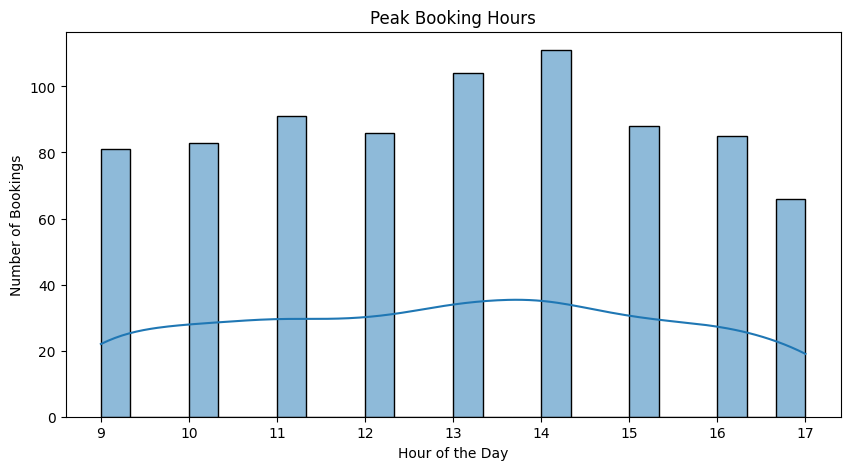

In [346]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Time Slot'].dt.hour, bins=24, kde=True)
plt.title("Peak Booking Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Bookings")
plt.show()

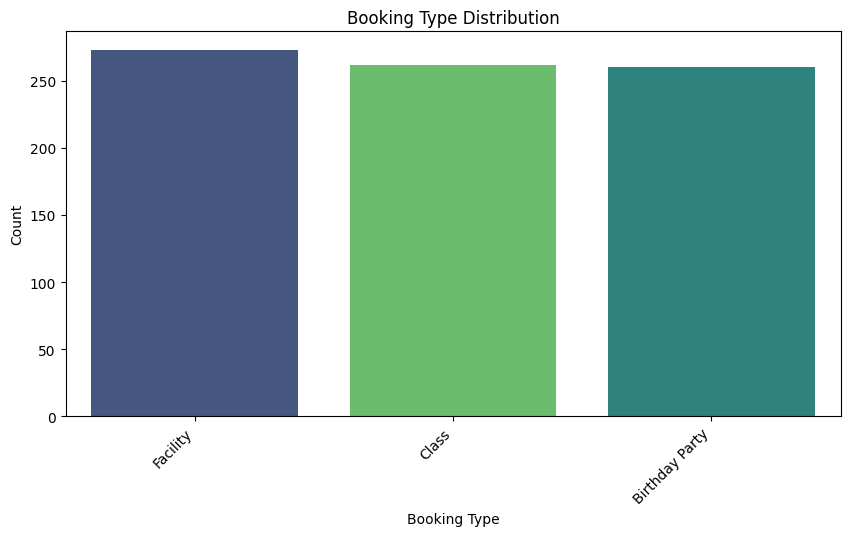

In [347]:
# Plot booking counts per type
plt.figure(figsize=(10, 5))
sns.countplot(x='Booking Type', hue='Booking Type', data=df, 
              order=df['Booking Type'].value_counts().index, 
              palette="viridis", legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Booking Type")
plt.ylabel("Count")
plt.title("Booking Type Distribution")
plt.show()

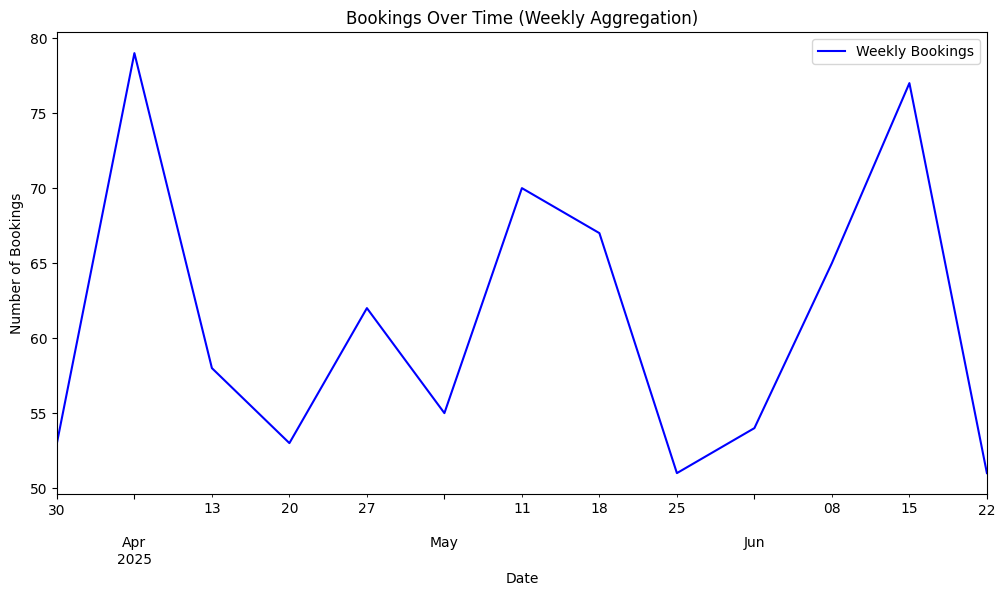

In [348]:
plt.figure(figsize=(12, 6))
df.set_index("Booking Date").resample("W").size().plot(label="Weekly Bookings", color="blue")
plt.title("Bookings Over Time (Weekly Aggregation)")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.legend()
plt.show()

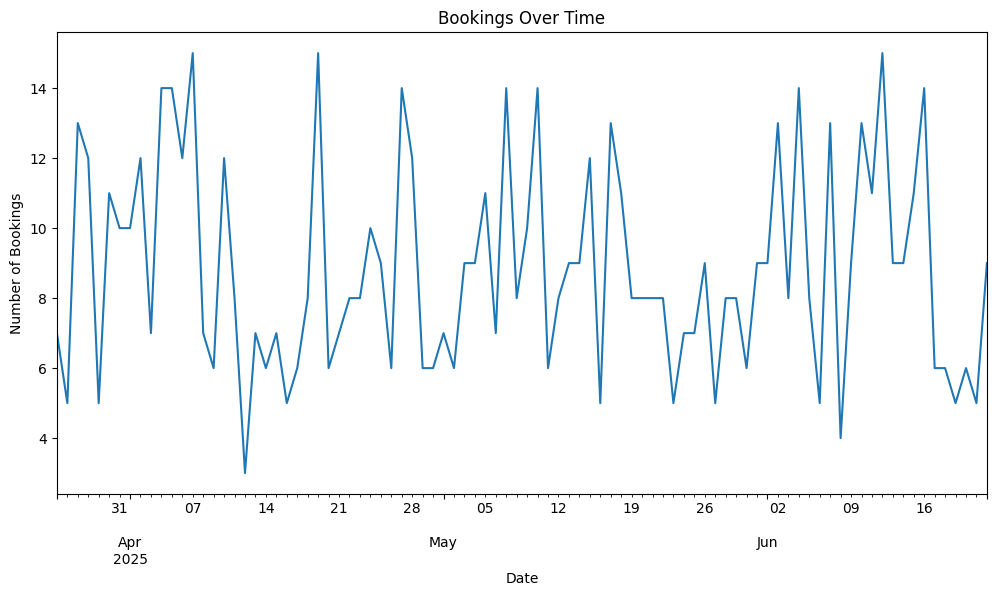

In [349]:
# Booking trends over time
plt.figure(figsize=(12, 6))
df.groupby('Booking Date').size().plot()
plt.title("Bookings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.show()

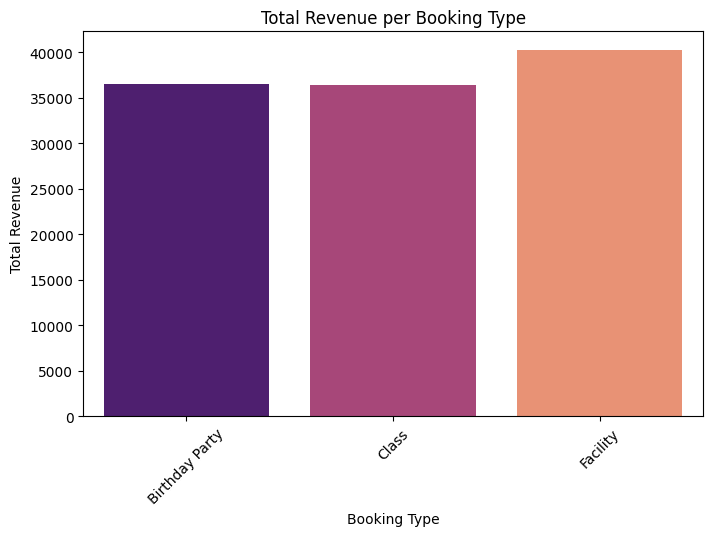

In [350]:
# Revenue by Booking Type
rev_by_type = df.groupby('Booking Type')['Price'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=rev_by_type, x='Booking Type', y='Price', hue='Booking Type', palette='magma', dodge=False)
plt.title("Total Revenue per Booking Type")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.show()

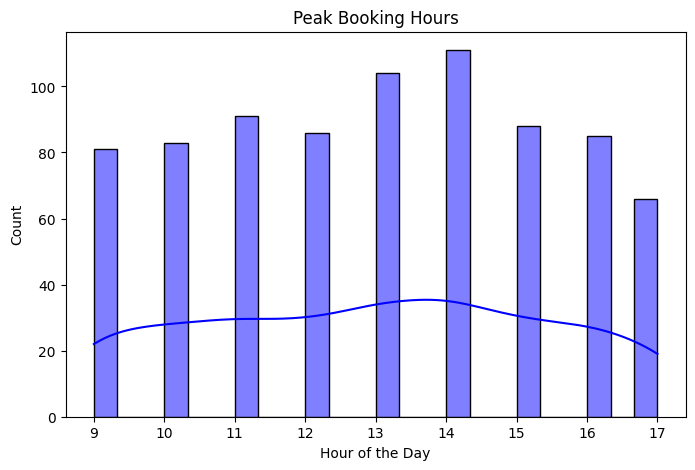

In [351]:
# Peak Booking Hours
df['Hour'] = pd.to_datetime(df['Time Slot'], errors='coerce').dt.hour
plt.figure(figsize=(8, 5))
sns.histplot(df['Hour'].dropna(), bins=24, kde=True, color='blue')
plt.title("Peak Booking Hours")
plt.xlabel("Hour of the Day")
plt.show()

In [352]:
# Revenue analysis
print("\nTotal Revenue:", df['Price'].sum())


Total Revenue: 113174.89


In [353]:
# Save the cleaned dataset
df.to_csv("Cleaned_Booking_Data.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_Booking_Data.csv'")


Cleaned dataset saved as 'Cleaned_Booking_Data.csv'


### Insights & Recommendations
### - Identify peak hours for better resource allocation
### - Analyze which services are booked most frequently
### - Revenue impact from different booking types

In [354]:
# Streamlit Interactive Dashboard
def app():
    st.title("Booking Data Dashboard")
    
    # Filters
    booking_types = df['Booking Type'].unique()
    selected_type = st.selectbox("Select Booking Type:", booking_types)
    
    filtered_df = df[df['Booking Type'] == selected_type]
    
    # Visualization
    st.subheader("Booking Distribution")
    st.bar_chart(filtered_df['Time Slot'].dt.hour.value_counts().sort_index())
    
    st.subheader("Summary Statistics")
    st.write(filtered_df.describe())
    
if __name__ == "__main__":
    app()

2025-03-27 00:33:59.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 00:33:59.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [355]:
import sqlite3

In [356]:
# SQL Database and Queries
conn = sqlite3.connect("booking_data.db")
df.to_sql("bookings", conn, if_exists="replace", index=False)

795

In [357]:
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores

In [358]:
# Example SQL Queries
query1 = "SELECT 'Booking Type', COUNT(*) AS Booking_Count FROM bookings GROUP BY 'Booking Type' ORDER BY Booking_Count DESC;"
query2 = "SELECT 'Customer ID', SUM(Price) AS Total_Spending FROM bookings GROUP BY 'Customer ID' ORDER BY Total_Spending DESC LIMIT 10;"

print("\nTop Booking Types:")
print(pd.read_sql(query1, conn))

print("\nTop 10 Customers by Spending:")
print(pd.read_sql(query2, conn))


Top Booking Types:
  'Booking Type'  Booking_Count
0   Booking Type            795

Top 10 Customers by Spending:
  'Customer ID'  Total_Spending
0   Customer ID       113174.89


In [359]:
top_booking_types = pd.read_sql(query1, conn)
top_booking_types.to_csv("Top_Booking_Types.csv", index=False)

top_customers = pd.read_sql(query2, conn)
top_customers.to_csv("Top_10_Customers.csv", index=False)

print("\nSQL results saved as CSV files.")


SQL results saved as CSV files.


In [360]:
# Close the database connection
conn.close()